<h1> Task 1 </h1>

In [1]:
# IMPORT NECESSARY MODULES
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4fba42a90>,
 Text(0.5, 1.0, 'Image 2'))

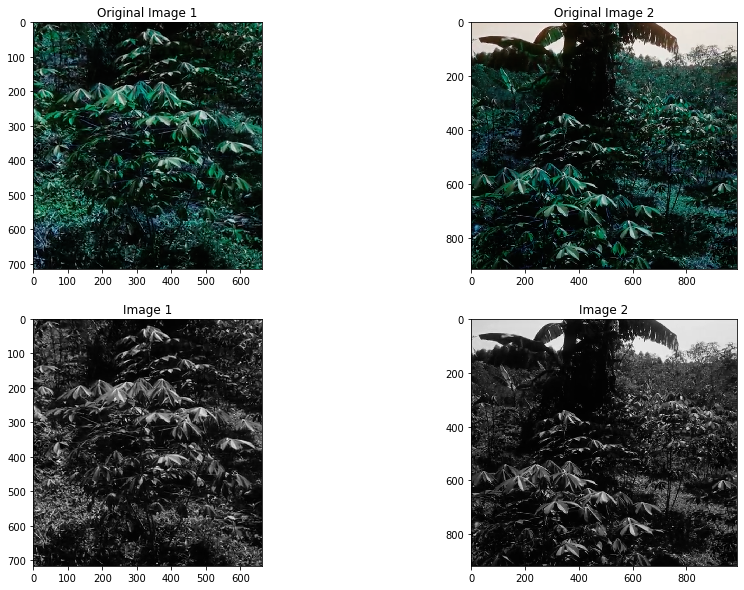

In [55]:
# IMPORT WORKING IMAGES
image1 = cv2.imread('./exam_images/image1.jpg')
image2 = cv2.imread('./exam_images/image3.jpg')

image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# display images
plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(image1),plt.title('Original Image 1')
plt.subplot(222), plt.imshow(image2),plt.title('Original Image 2')
plt.subplot(223), plt.imshow(image1_gray, cmap='gray'),plt.title('Image 1')
plt.subplot(224), plt.imshow(image2_gray, cmap='gray'),plt.title('Image 2')


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4fe4f1518>,
 Text(0.5, 1.0, 'Image 2 - 12108 keypoints'))

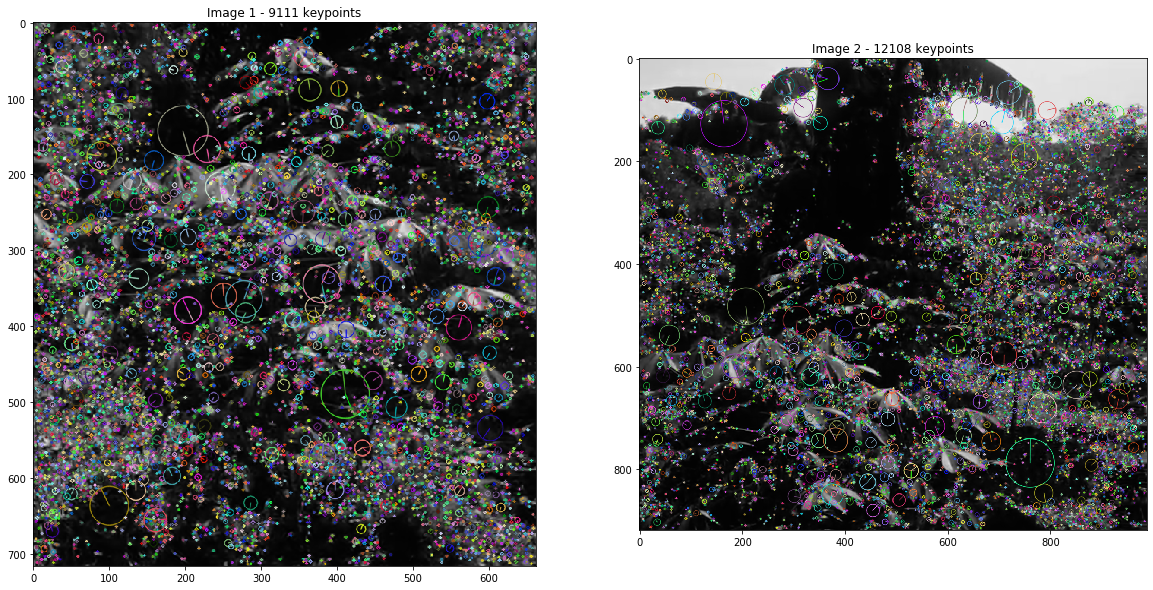

In [56]:
# feature detection [identifying interest points and descriptors for each point]
sift = cv2.SIFT_create()
image1_keypoints, image1_descriptors = sift.detectAndCompute(image1_gray,None)
image2_keypoints, image2_descriptors = sift.detectAndCompute(image2_gray,None)


# display images
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(cv2.drawKeypoints(image1_gray,image1_keypoints,image1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)),plt.title(f'Image 1 - {len(image1_keypoints)} keypoints')
plt.subplot(122), plt.imshow(cv2.drawKeypoints(image2_gray,image2_keypoints,image2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)),plt.title(f'Image 2 - {len(image2_keypoints)} keypoints')


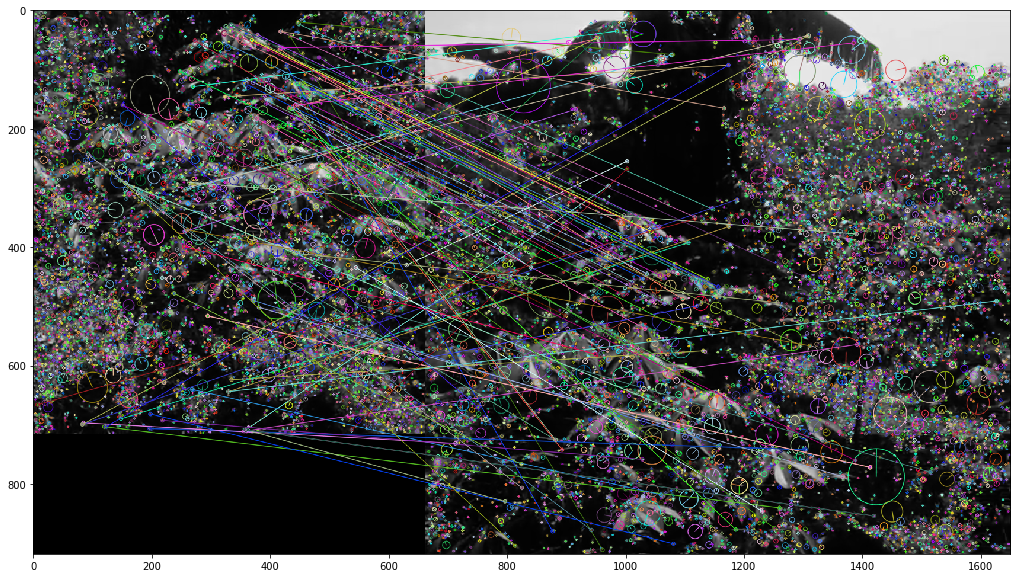

(<matplotlib.image.AxesImage at 0x7fd4ebb8a0b8>, None)

In [59]:
# matching [compare descriptors across images] using Brute-force matcher
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)

matches = matcher.match(image1_descriptors,image2_descriptors)

# Sort the matches in the order of their distances.
matches = sorted(matches, key = lambda x:x.distance)

# display 100 matched features
matched_image = cv2.drawMatches(image1, image1_keypoints, image2, image2_keypoints, matches[:100], image2, flags=2)
plt.figure(figsize=(30,10))
plt.imshow(matched_image),plt.show()


# Task 2

In [ ]:
c